IMPORT LIBRARIES 

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



READ THE CSV FILE

In [120]:
file_path = "C:\\Users\\Deekshitha CH\\Downloads\\WineQT.csv"

data= pd.read_csv(file_path)

data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

DATA EXPLORATION

In [121]:
print("Shape of the dataset:", data.shape)
print("Columns in the dataset:", data.columns)
data.describe()

Shape of the dataset: (1143, 13)
Columns in the dataset: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

DATA CLEANING

In [122]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


DATA VISUALIZATION

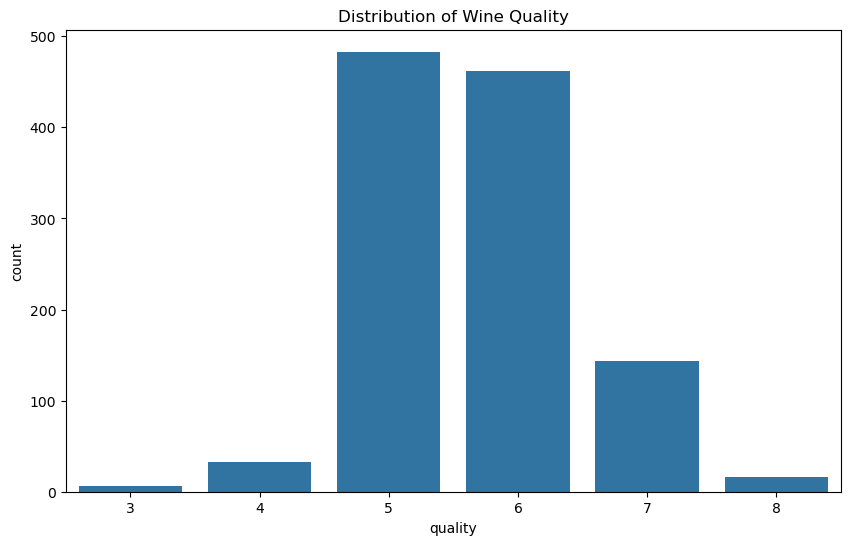

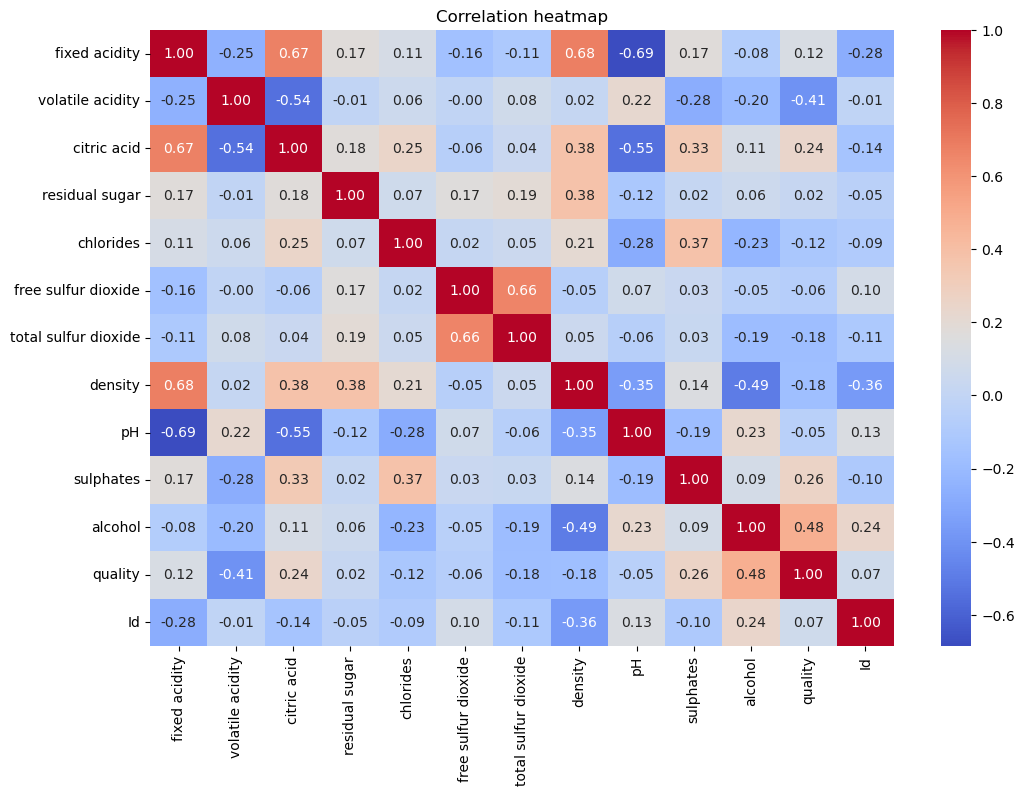

In [123]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

FEATURE SELECTION

In [124]:
X= data.drop(columns=['quality', 'Id'])
y= data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODEL TRAINING


RANDOM FOREST CLASSIFIER 

CHECK CLASS DISTRIBUTION

In [125]:
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTesting set class distribution:")
print(y_test.value_counts())


Training set class distribution:
quality
5    387
6    363
7    117
4     27
8     14
3      6
Name: count, dtype: int64

Testing set class distribution:
quality
6    99
5    96
7    26
4     6
8     2
Name: count, dtype: int64


ADJUST THE RANDOM FOREST MODEL 


USE CLASS WEIGHTS


In [126]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced')
rf_model.fit(X_train,y_train)

rf_predictions = rf_model.predict(X_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test,rf_predictions))
print("Random Forest Accuracy:",accuracy_score(y_test,rf_predictions))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.79      0.75        96
           6       0.66      0.68      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.42      0.42       229
weighted avg       0.67      0.69      0.68       229

Random Forest Accuracy: 0.6943231441048034


c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


UNDER_SAMPLING OR OVER_SAMPLING

In [127]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sampled,y_resampled = smote.fit_resample(X_train,y_train)

rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_sampled,y_resampled)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test,rf_predictions))
print("Random Forest Accuracy:",accuracy_score(y_test,rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.73      0.73      0.73        96
           6       0.64      0.49      0.56        99
           7       0.48      0.88      0.62        26
           8       0.00      0.00      0.00         2

    accuracy                           0.62       229
   macro avg       0.31      0.35      0.32       229
weighted avg       0.64      0.62      0.62       229

Random Forest Accuracy: 0.6200873362445415


c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MODIFY THE CLASSIFICATION REPORT CALL

In [128]:
print(classification_report(y_test,rf_predictions,zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.73      0.73      0.73        96
           6       0.64      0.49      0.56        99
           7       0.48      0.88      0.62        26
           8       0.00      0.00      0.00         2

    accuracy                           0.62       229
   macro avg       0.31      0.35      0.32       229
weighted avg       0.64      0.62      0.62       229



VISUALIZE CLASS PREDICTIONS

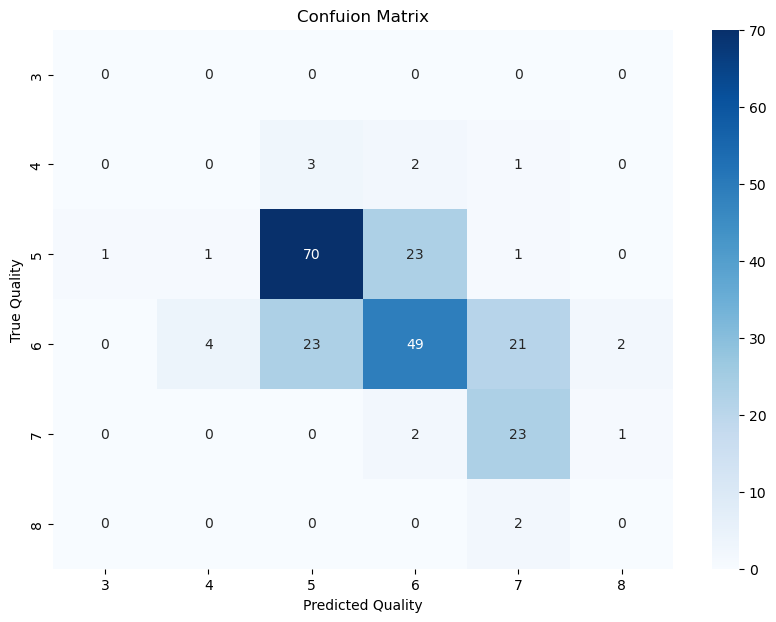

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt 

cm = confusion_matrix(y_test,rf_predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot= True,fmt='d',cmap='Blues',xticklabels=np.unique(y),yticklabels=np.unique(y))
plt.title('Confuion Matrix')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.show()

In [130]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

rf_predictions = rf_model.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test,rf_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.68      0.67      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.68      0.70      0.69       229

Random Forest Accuracy: 0.7030567685589519


c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


STOCHASTIC GRADIENT DESCENT

In [131]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train,y_train)

sgd_predictions= sgd_model.predict(X_test)
print("SGD Classifier Report:")
print(classification_report(y_test,sgd_predictions))
print("SGD Accuracy:",accuracy_score(y_test,sgd_predictions))

SGD Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.46      0.98      0.63        96
           6       0.56      0.05      0.09        99
           7       0.38      0.23      0.29        26
           8       0.00      0.00      0.00         2

    accuracy                           0.46       229
   macro avg       0.28      0.25      0.20       229
weighted avg       0.48      0.46      0.34       229

SGD Accuracy: 0.4585152838427948


c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SUPPORT VECTOR CLASSIFIER

In [132]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train,y_train)

svc_predictions = svc_model.predict(X_test)
print("SVC Classifier Report")
print(classification_report(y_test,svc_predictions))
print("SVC Accuracy:",accuracy_score(y_test,svc_predictions))

SVC Classifier Report
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.43      0.54        96
           6       0.51      0.88      0.64        99
           7       1.00      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.45      0.27      0.25       229
weighted avg       0.64      0.56      0.51       229

SVC Accuracy: 0.5633187772925764


c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


VISUALIZE PREDICTIONS

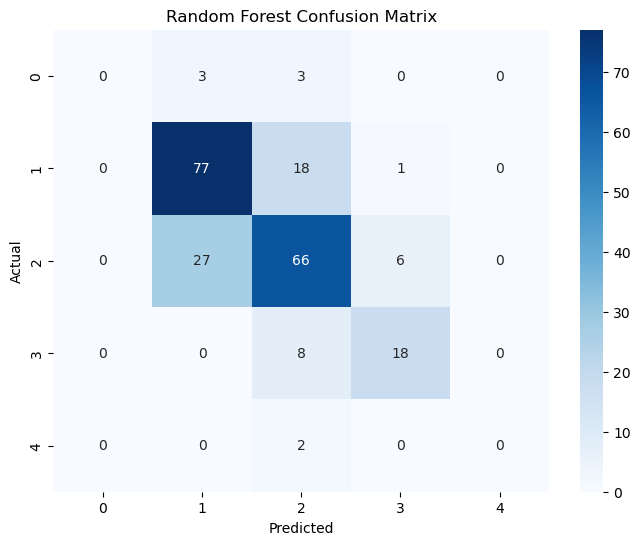

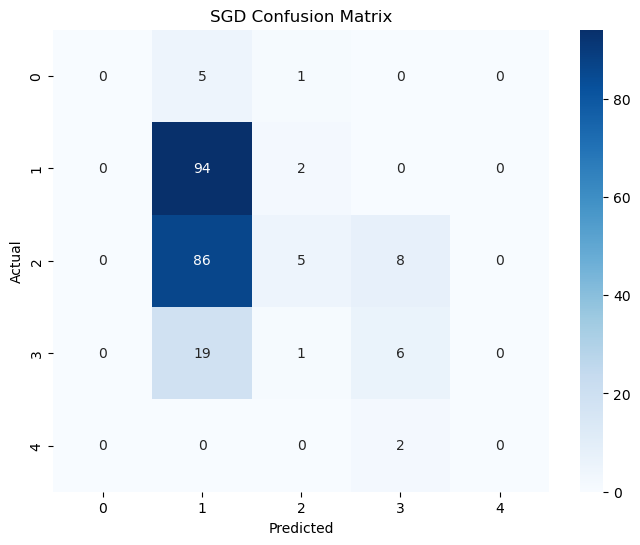

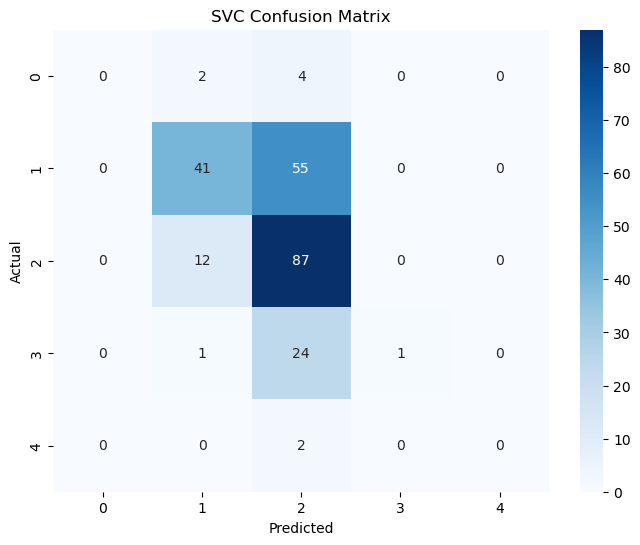

In [133]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Assuming y_test and predictions are defined correctly
plot_confusion_matrix(confusion_matrix(y_test, rf_predictions), title='Random Forest Confusion Matrix')
plot_confusion_matrix(confusion_matrix(y_test, sgd_predictions), title='SGD Confusion Matrix')
plot_confusion_matrix(confusion_matrix(y_test, svc_predictions), title='SVC Confusion Matrix')

HYPERPARAMETER TUNING

In [134]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

data= pd.read_csv("C:\\Users\\Deekshitha CH\\Downloads\\WineQT.csv")

X=data.drop(columns=['quality','Id'])
y=data['quality'] 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5,scoring='accuracy')
grid_search_rf.fit(X_train,y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_
rf_prediction = best_rf_model.predict(X_test)

print("Random Forest Classifier Report")
print(classification_report(y_test,rf_predictions))
print("Random Forest Accuracy:",accuracy_score(y_test,rf_predictions))

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Classifier Report
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.68      0.67      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.68      0.70      0.69       229

Random Forest Accuracy: 0.7030567685589519


c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


FEATURE IMPORTANCE ANALYSIS

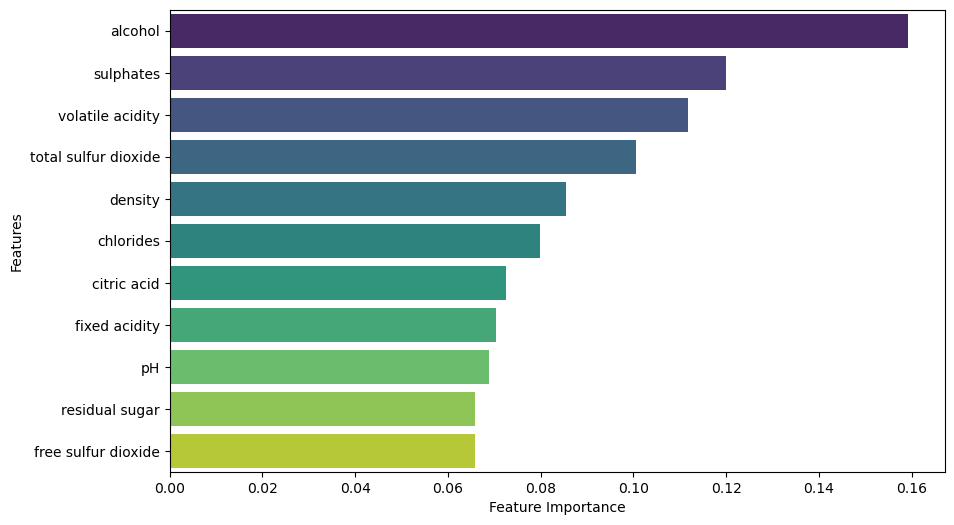

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
best_rf_model = grid_search_rf.best_estimator_
importances = best_rf_model.feature_importances_
feature_importances= pd.DataFrame(importances,index=X.columns,columns=['Importance']).sort_values('Importance',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.Importance,y=feature_importances.index,hue=feature_importances.index,palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

CROSS VALIDATION

In [136]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest using the best model from GridSearchCV
cv_scores = cross_val_score(best_rf_model, X, y, cv=5)

print("Cross-validation scores for Random Forest:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores for Random Forest: [0.55021834 0.62008734 0.60262009 0.5877193  0.56578947]
Mean cross-validation score: 0.5852869072243928


ENSEMBLE LEARNING

In [137]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# Make sure you have trained the SGD and SVC models before this step
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

svc_model = SVC(probability=True, random_state=42)  # probability=True is needed for soft voting
svc_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [138]:
# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf_model),  # Use the best Random Forest model
    ('sgd', sgd_model),    # Stochastic Gradient Descent model
    ('svc', svc_model)],   # Support Vector Classifier model
    voting='hard')         # 'hard' voting means the majority class will be taken

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions and evaluate
voting_predictions = voting_clf.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_predictions))

Voting Classifier Accuracy: 0.6462882096069869


ADDITIONAL VISUALIZATIONS

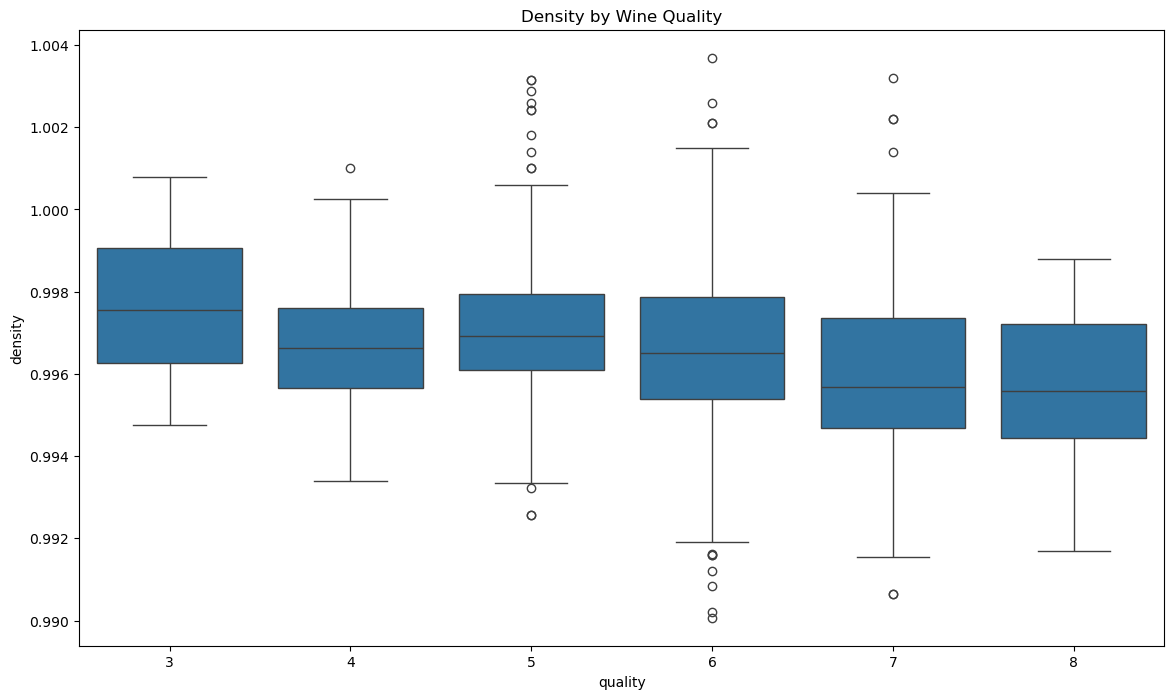

In [139]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='quality', y='density')
plt.title('Density by Wine Quality')
plt.show()

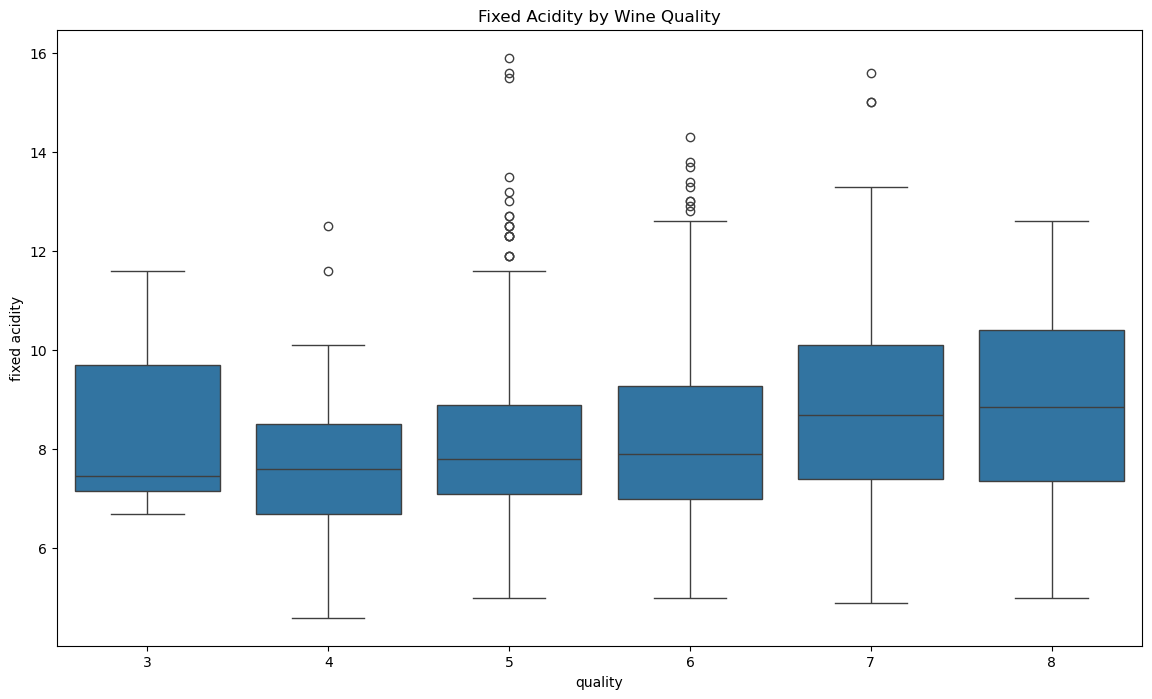

In [140]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='quality', y='fixed acidity')
plt.title('Fixed Acidity by Wine Quality')
plt.show()

MODEL COMPARISON

Text(0.5, 1.0, 'Model Comparison')

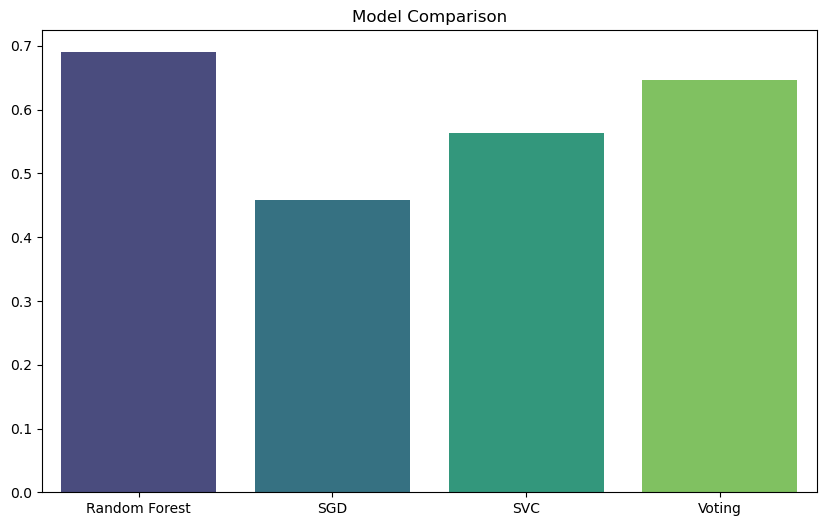

In [141]:
# Assuming you have already trained your models: best_rf_model, sgd_model, svc_model, and voting_clf

# Make predictions

rf_predictions = best_rf_model.predict(X_test)
sgd_predictions = sgd_model.predict(X_test)
svc_predictions = svc_model.predict(X_test)
voting_predictions = voting_clf.predict(X_test)

# Collecting accuracy scores
models = ('Random Forest', 'SGD', 'SVC', 'Voting')
scores = [
     accuracy_score(y_test, rf_predictions),
    accuracy_score(y_test, sgd_predictions),
    accuracy_score(y_test, svc_predictions),
    accuracy_score(y_test, voting_predictions)
]

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=scores, palette='viridis', hue=models) # Add a color palette for better visuals
plt.title('Model Comparison')

HANDLING IMBALANCED CLASSES

In [142]:
# Step 1: Import the necessary Libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Apply SMOTE to handle class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)  # Corrected assignment operator

# Step 3: Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Step 4: Define and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Corrected assignment and argument syntax
rf_model.fit(X_train_resampled, y_train_resampled)  # Fit the model on the resampled dataset

# Step 5: Make predictions on the test set
rf_predictions_resampled = rf_model.predict(X_test_resampled)

# Step 6: Evaluate the model's performance
print("Random Forest Classifier Report on Resampled Data:")
print(classification_report(y_test_resampled, rf_predictions_resampled))
print("Random Forest Accuracy on Resampled Data:", accuracy_score(y_test_resampled, rf_predictions_resampled))


Random Forest Classifier Report on Resampled Data:
              precision    recall  f1-score   support

           3       0.99      1.00      0.99        97
           4       0.93      0.95      0.94        92
           5       0.80      0.69      0.74       108
           6       0.66      0.62      0.64        95
           7       0.78      0.91      0.84        96
           8       0.96      0.98      0.97        92

    accuracy                           0.85       580
   macro avg       0.85      0.86      0.85       580
weighted avg       0.85      0.85      0.85       580

Random Forest Accuracy on Resampled Data: 0.8517241379310345


SAVE AND LOAD MODELS

In [143]:
import joblib
# Save the model
joblib.dump(rf_model, 'random_forest_model.pk1')
#Load the model
loaded_rf_model = joblib.load('random_forest_model.pk1')

PAIR PLOT

<Figure size 1200x800 with 0 Axes>

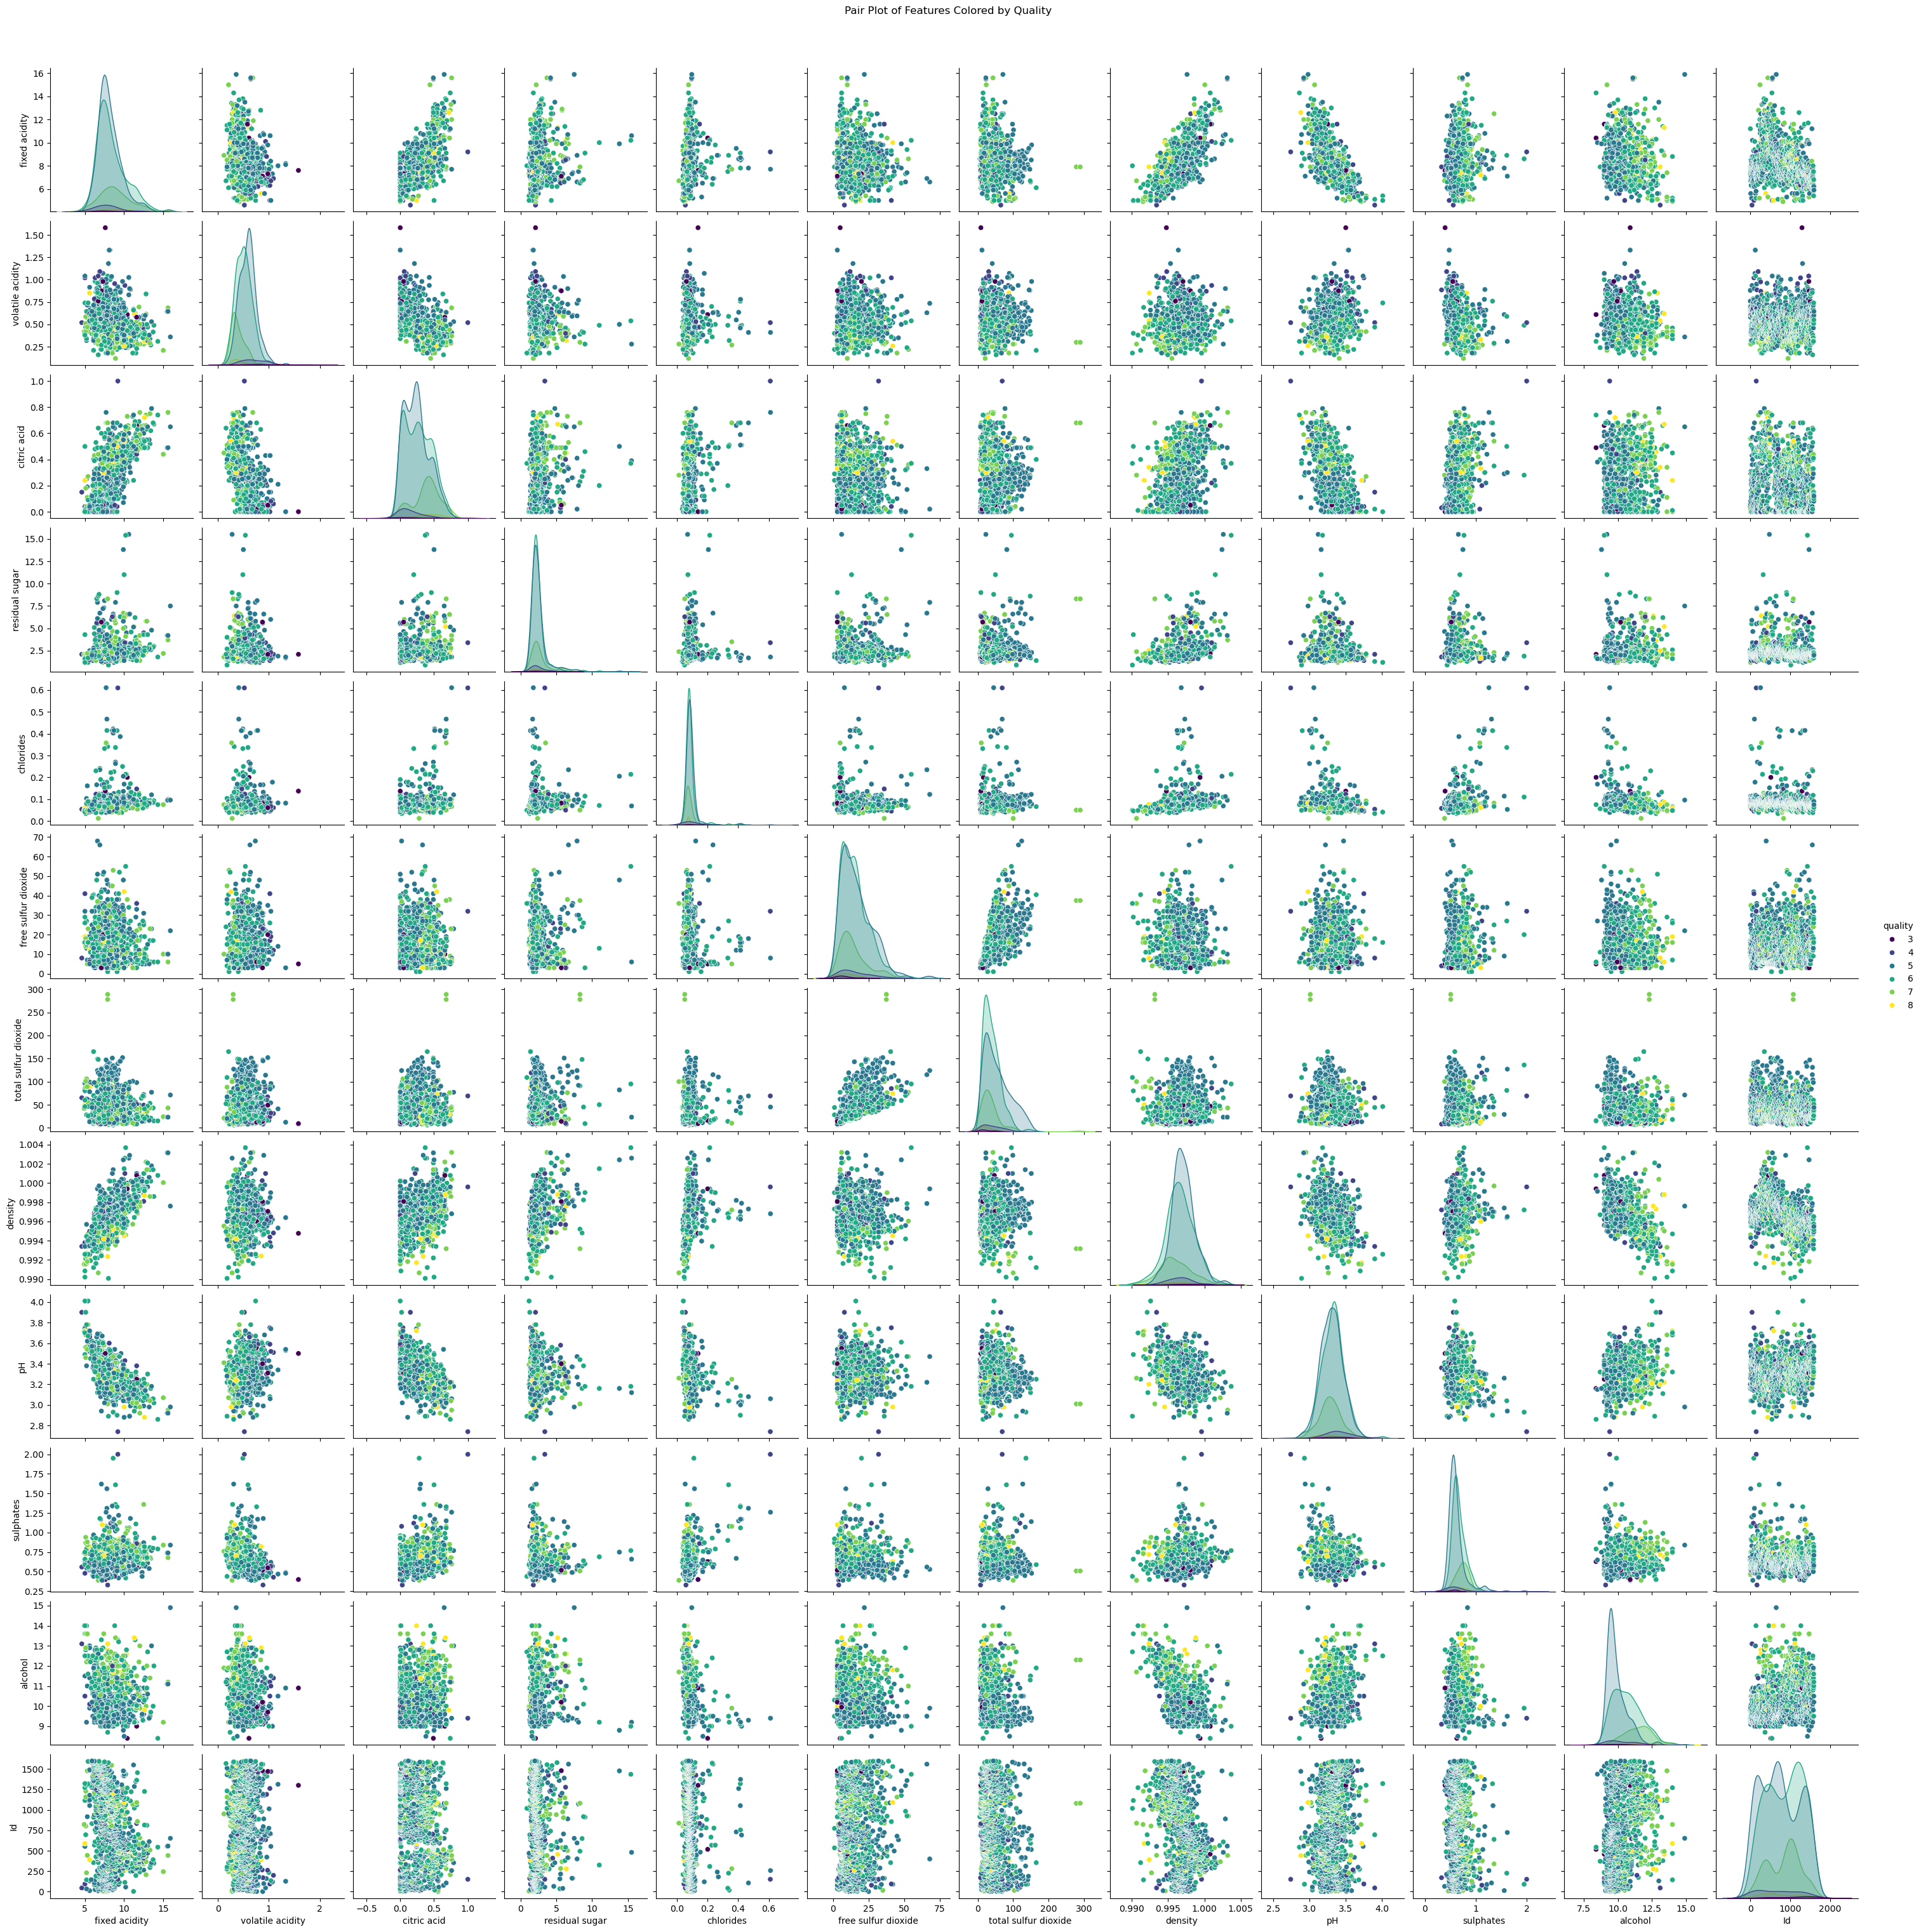

In [144]:
# Assuming 'data' is your DataFrame with a 'quality' column
plt.figure(figsize=(12, 8))
sns.pairplot(data, hue='quality', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Features Colored by Quality', y=1.02)  # Add a title for the entire plot
plt.show()

SWARM PLOT

c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Deekshitha CH\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


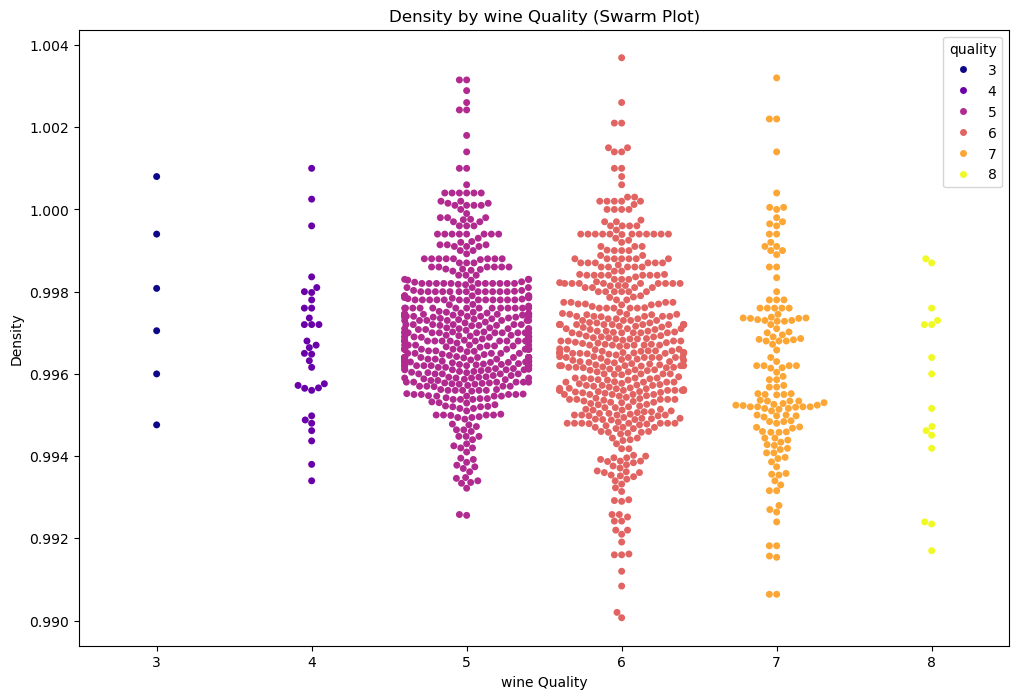

In [145]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='quality', y='density', data=data, hue='quality', palette='plasma')
plt.title('Density by wine Quality (Swarm Plot)')
plt.xlabel('wine Quality')
plt.ylabel('Density')
plt.show()

VIOLIN PLOT

C:\Users\Deekshitha CH\AppData\Local\Temp\ipykernel_23080\2320725459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y='fixed acidity', data=data, palette='coolwarm')


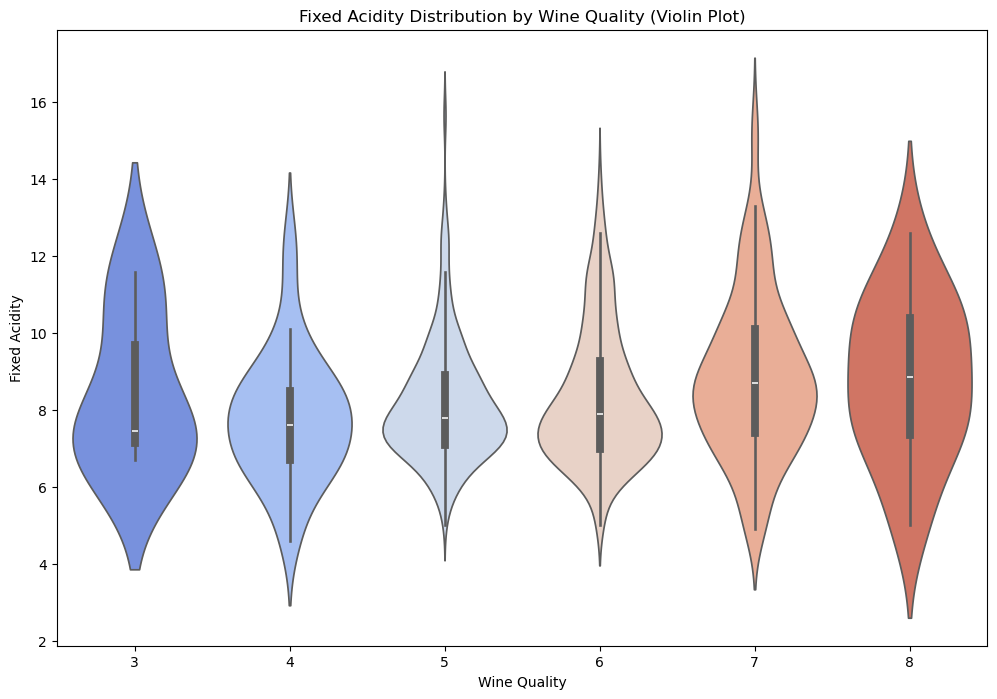

In [146]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='quality', y='fixed acidity', data=data, palette='coolwarm')
plt.title('Fixed Acidity Distribution by Wine Quality (Violin Plot)')
plt.xlabel('Wine Quality')
plt.ylabel('Fixed Acidity')
plt.show()

CORRELATION HEATMAP WITH COLOUR PALETTE

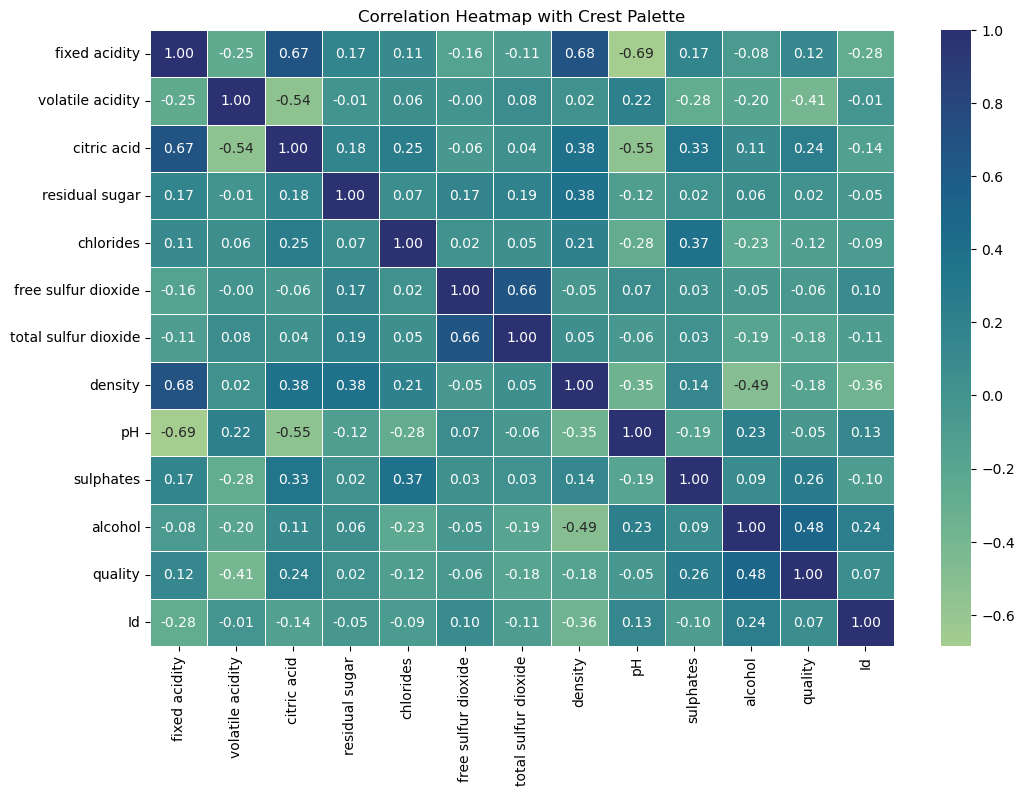

In [147]:
plt.figure(figsize=(12, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='crest', linewidths=0.5)
plt.title('Correlation Heatmap with Crest Palette')
plt.show()

COUNT PLOT WITH A COLOUR PALETTE

C:\Users\Deekshitha CH\AppData\Local\Temp\ipykernel_23080\3172348372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='Set2')


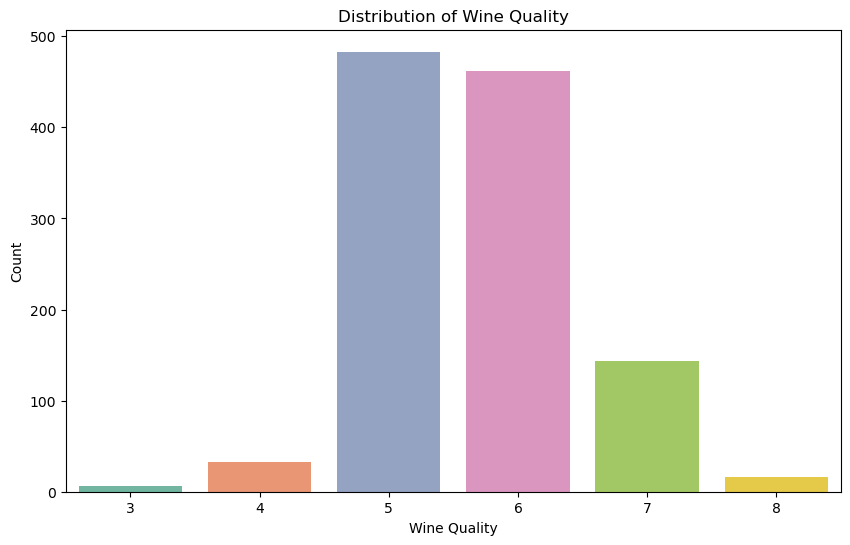

In [148]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data, palette='Set2')
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

KDE PLOT

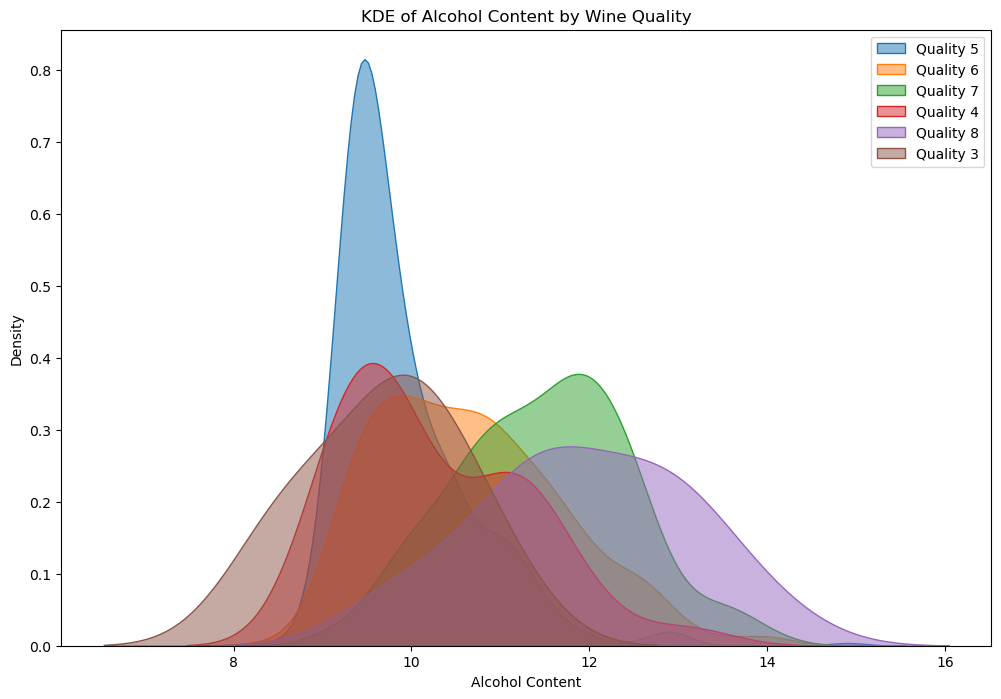

In [149]:
plt.figure(figsize=(12, 8))
for quality in data['quality'].unique():
    sns.kdeplot(
        data[data['quality'] == quality]['alcohol'], 
        label=f'Quality {quality}', 
        fill=True, 
        alpha=0.5
    )
plt.title('KDE of Alcohol Content by Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.legend()
plt.show()

SCATTER PLOT WITH REGRESSION LINE

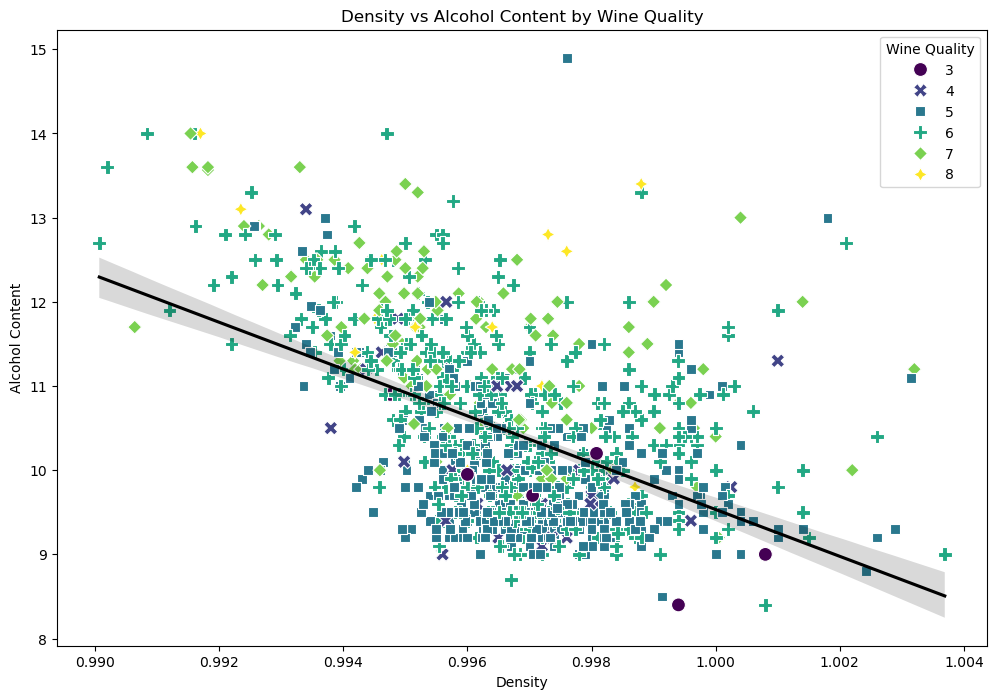

In [150]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='density', y='alcohol', hue='quality', data=data, palette='viridis', style='quality', s=100)
sns.regplot(x="density", y='alcohol', data=data, scatter=False, color="black")
plt.title('Density vs Alcohol Content by Wine Quality')
plt.xlabel('Density')
plt.ylabel('Alcohol Content')
plt.legend(title='Wine Quality')
plt.show()

BAR PLOT AVERAGE FEATURES BY QUALITY

<Figure size 1200x600 with 0 Axes>

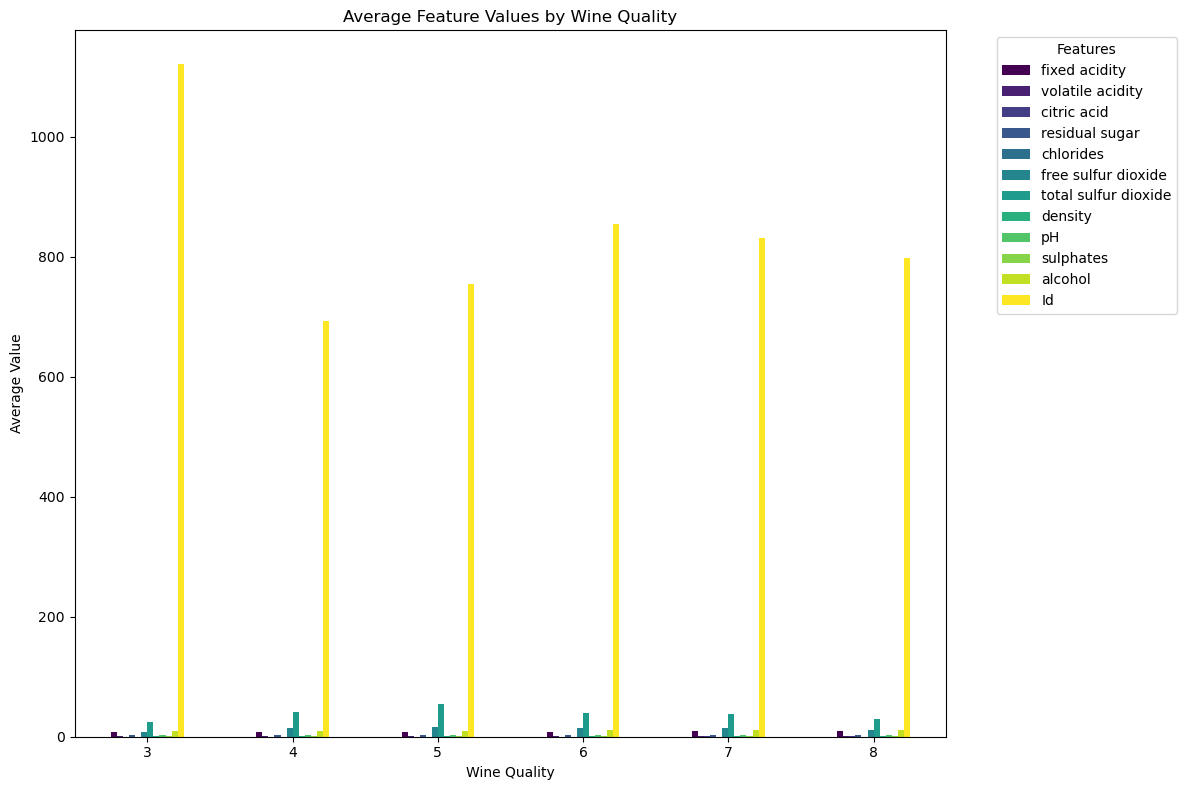

In [151]:
average_features = data.groupby('quality').mean()

plt.figure(figsize=(12, 6))
average_features.plot(kind='bar', colormap='viridis', figsize=(12, 8))
plt.title('Average Feature Values by Wine Quality')
plt.ylabel('Average Value')
plt.xlabel('Wine Quality')
plt.xticks(rotation=0)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

BOX PLOT

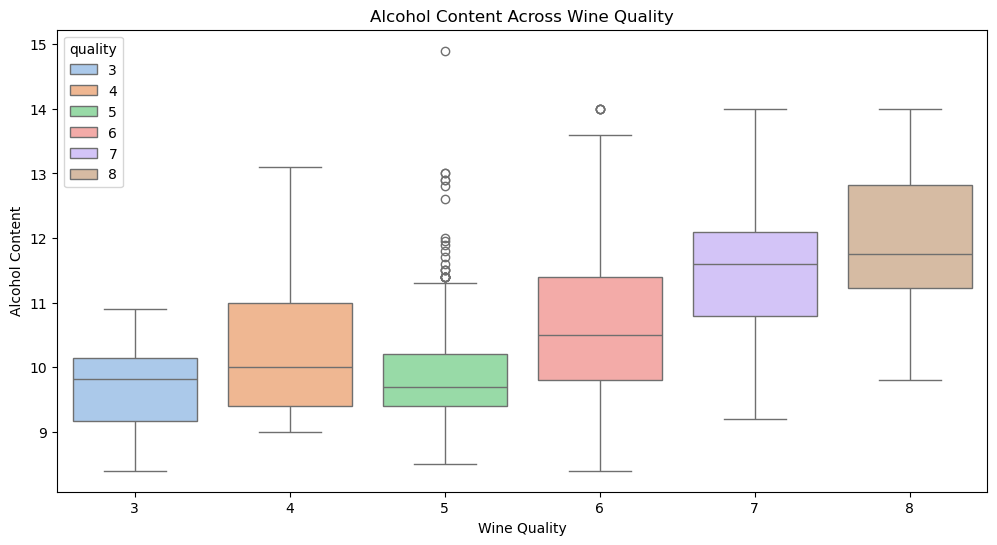

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:\\Users\\Deekshitha CH\\Downloads\\WineQT.csv")

# Box plot for alcohol content
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='alcohol', data=df, hue='quality', palette="pastel")
plt.title('Alcohol Content Across Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()

DISTRIBUTION PLOT

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

<Figure size 1200x600 with 0 Axes>

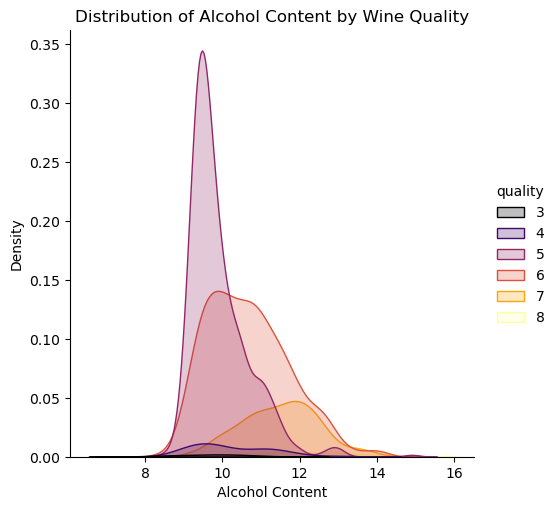

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\Deekshitha CH\\Downloads\\WineQT.csv")
print(df.head())

# Distribution plot for alcohol
plt.figure(figsize=(12, 6))
sns.displot(df, x='alcohol', hue='quality', kind='kde', palette='inferno', fill=True)
plt.title('Distribution of Alcohol Content by Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.show()

FEATURE RELATIONSHIPS WITH QUALITY

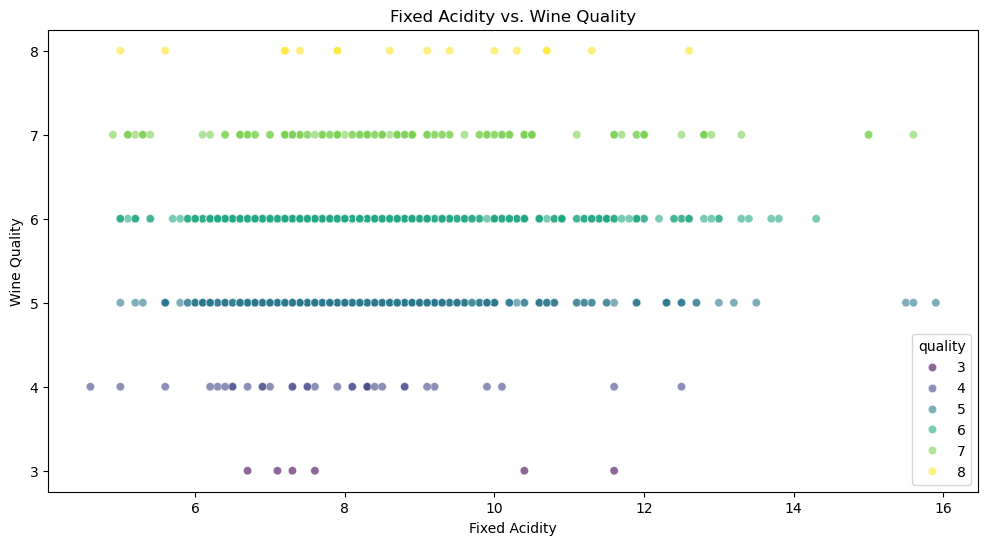

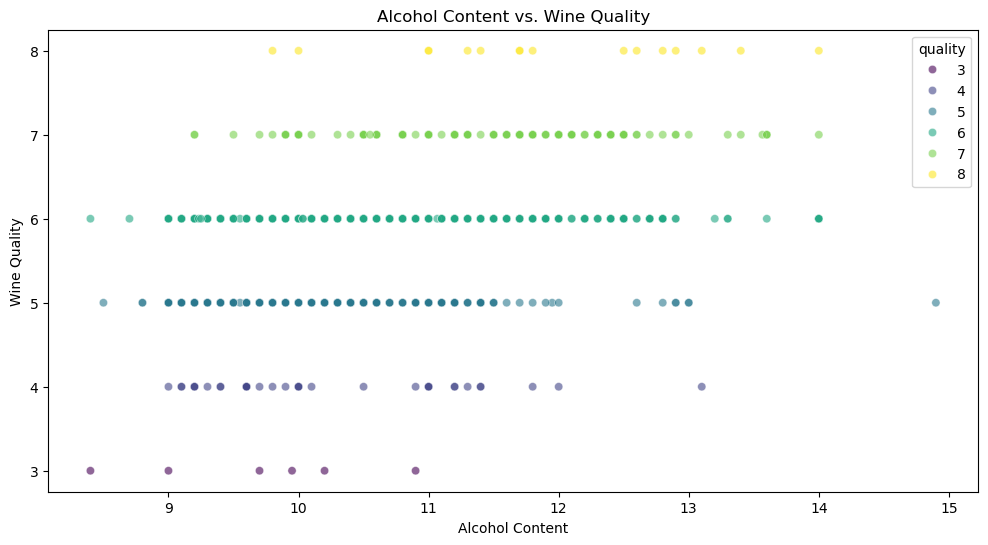

In [154]:
# Scatter plots for fixed acidity vs. quality
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='fixed acidity', y='quality', hue='quality', palette='viridis', alpha=0.6)
plt.title('Fixed Acidity vs. Wine Quality')
plt.xlabel('Fixed Acidity')
plt.ylabel('Wine Quality')
plt.show()

# Scatter plots for alcohol vs. quality
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='alcohol', y='quality', hue='quality', palette='viridis', alpha=0.6)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.show()